In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('F:ExcelR/Projects/Loan Prediction/train.csv')

In [3]:
test = pd.read_csv('F:ExcelR/Projects/Loan Prediction/test.csv')

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
train_copy = train.copy()
test_copy = test.copy()

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
train.shape, test.shape

((614, 13), (367, 12))

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

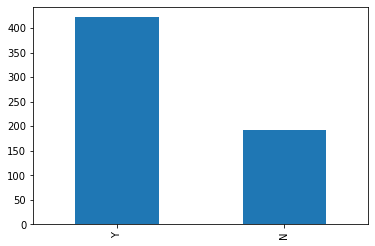

In [12]:
train['Loan_Status'].value_counts().plot.bar()

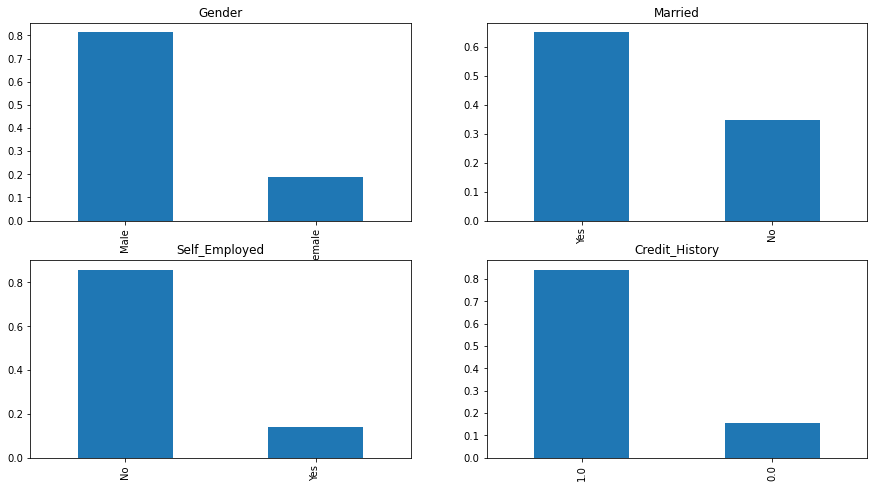

In [13]:
plt.figure(figsize=(15, 8))
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

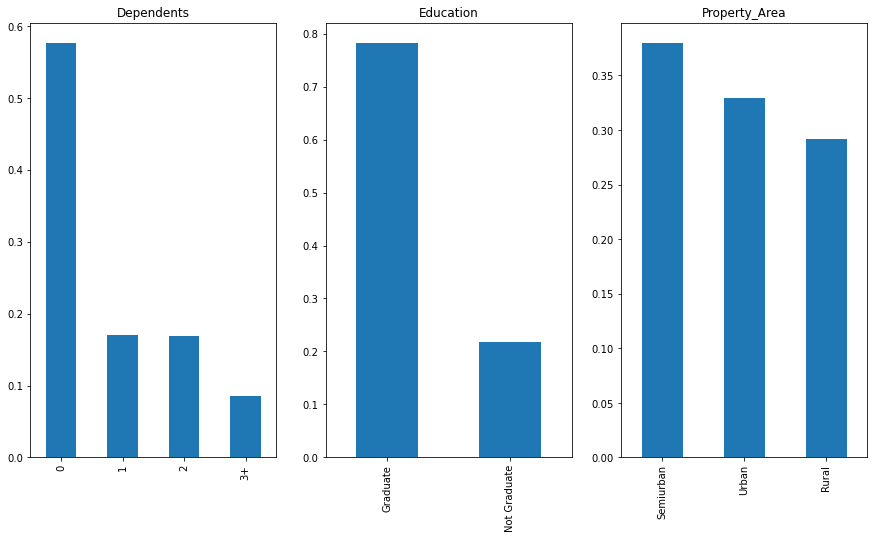

In [14]:
plt.figure(figsize=(15, 8))
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

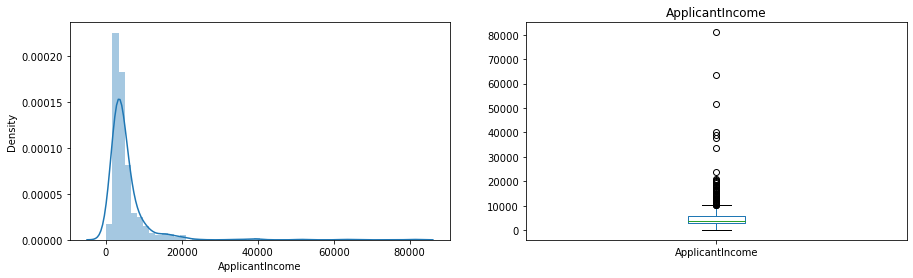

In [15]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(title='ApplicantIncome', figsize=(15, 4))
plt.show()

Text(0.5, 0.98, '')

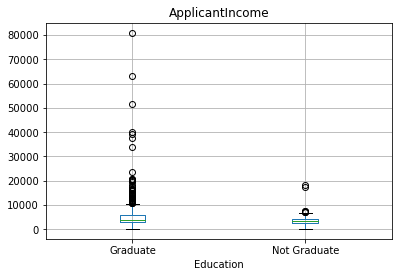

In [16]:
train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

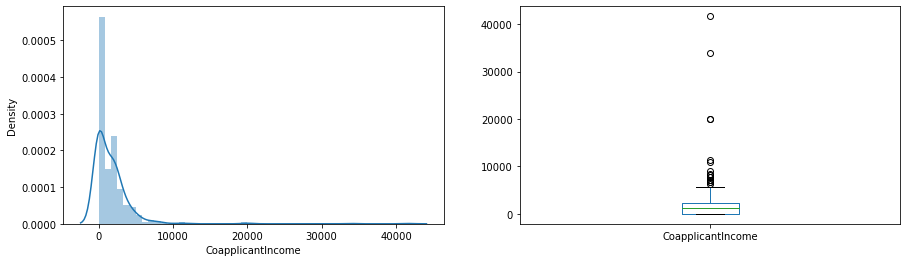

In [17]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box( figsize=(15, 4))
plt.show()

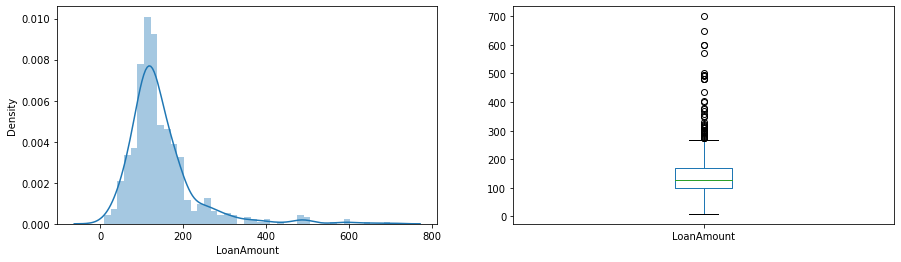

In [18]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box( figsize=(15, 4))
plt.show()

<AxesSubplot:xlabel='Gender'>

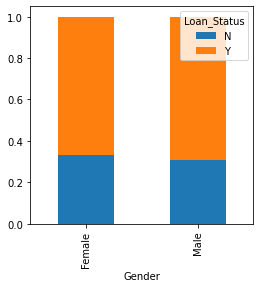

In [19]:
gender = pd.crosstab(train['Gender'], train['Loan_Status'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

In [20]:
married = pd.crosstab(train['Married'], train['Loan_Status'])
dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
education = pd.crosstab(train['Education'], train['Loan_Status'])
self_employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])

<AxesSubplot:xlabel='Self_Employed'>

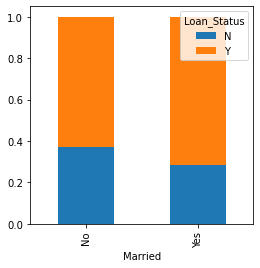

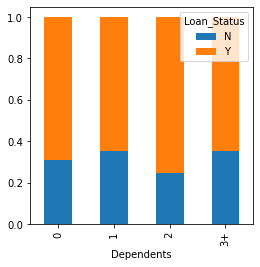

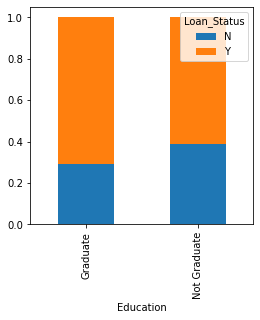

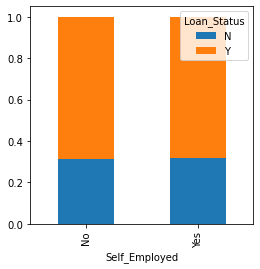

In [21]:
married.div(married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
dependents.div(dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
education.div(education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
self_employed.div(self_employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Property_Area'>

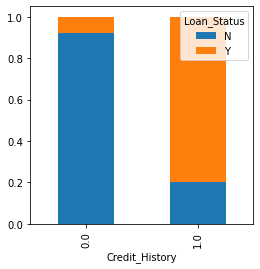

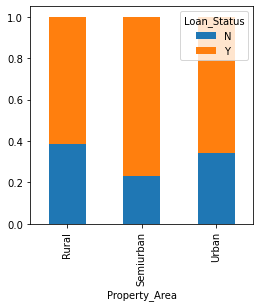

In [22]:
credit_history = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
credit_history.div(credit_history.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

<AxesSubplot:xlabel='Loan_Status'>

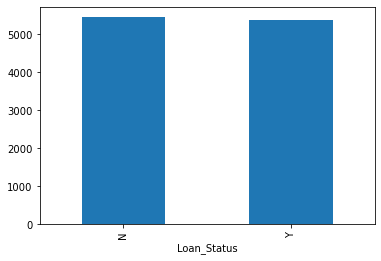

In [23]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

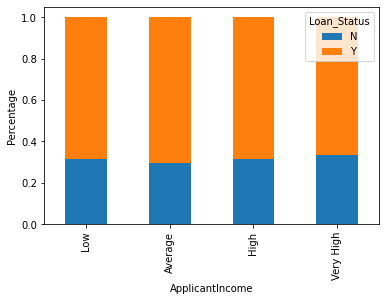

In [24]:
bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'], bins, labels=group)

Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

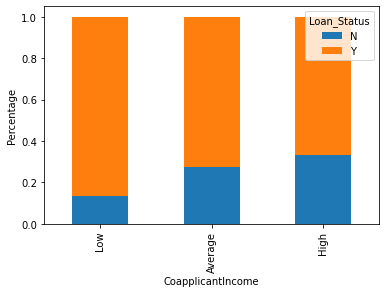

In [25]:
bins = [0, 1000, 3000, 42000]
group = ['Low', 'Average', 'High']
train['Co_Income_bin'] = pd.cut(train['CoapplicantIncome'], bins, labels=group)

Co_Income_bin = pd.crosstab(train['Co_Income_bin'], train['Loan_Status'])
Co_Income_bin.div(Co_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

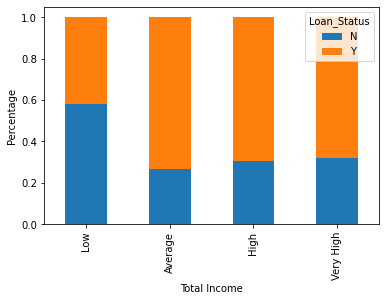

In [26]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins = [0, 2500, 4000, 8000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'], bins, labels=group)

Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

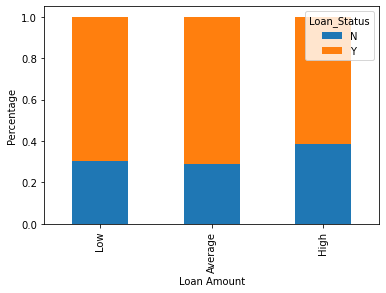

In [27]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')

In [28]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Co_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average


In [29]:
train= train.drop(['Income_bin','Total_Income', 'Co_Income_bin','Total_Income_bin', 'LoanAmount_bin'], axis=1)

In [30]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

<AxesSubplot:>

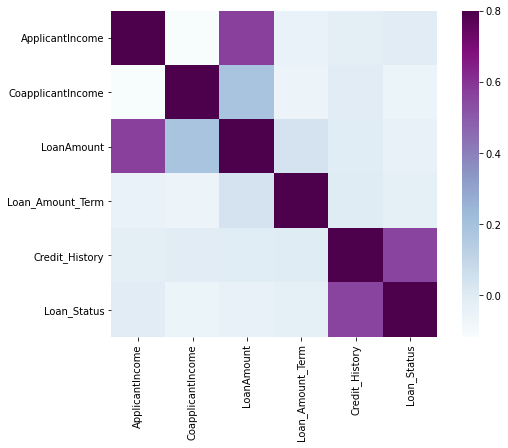

In [31]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu')

In [32]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [34]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [35]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)

In [37]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

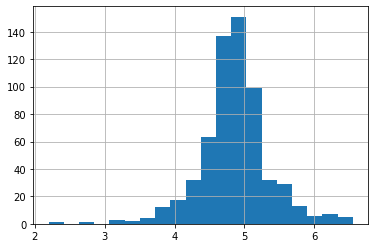

In [38]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [39]:
train= train.drop('Loan_ID', axis=1)
test= test.drop('Loan_ID', axis=1)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
 12  LoanAmount_log     614 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 62.5+ KB


In [41]:
x = train.drop('Loan_Status', 1)
y = train['Loan_Status']

In [42]:
x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(train)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [46]:
pred_cv = model.predict(x_test)

In [47]:
accuracy_score(y_test, pred_cv)

0.812807881773399

In [51]:
test= test.drop('Loan_Status', 1)

In [52]:
pred_test = model.predict(test)

In [53]:
submission = pd.read_csv('F:ExcelR/Projects/Loan Prediction/sample.csv')

In [54]:
submission['Loan_Status'] = pd.Series(pred_test)
submission['Loan_ID'] = test_copy['Loan_ID']

In [55]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Loan_ID      367 non-null    object
 1   Loan_Status  367 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.9+ KB


In [56]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [57]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('logistic.csv')

In [58]:
from sklearn.model_selection import StratifiedKFold

In [59]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold{}'.format(i,kf.n_splits))
    xtr,xvl = x.iloc[train_index], x.iloc[test_index]
    ytr,yvl = y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('Accuracy Score : ', score)
    i+=1
    pred_test = model.predict(test)
    pred= model.predict_proba(xvl)[:,1]


1 of kfold5
Accuracy Score :  0.8048780487804879

2 of kfold5
Accuracy Score :  0.8373983739837398

3 of kfold5
Accuracy Score :  0.7804878048780488

4 of kfold5
Accuracy Score :  0.7886178861788617

5 of kfold5
Accuracy Score :  0.7950819672131147


In [60]:
from sklearn import metrics

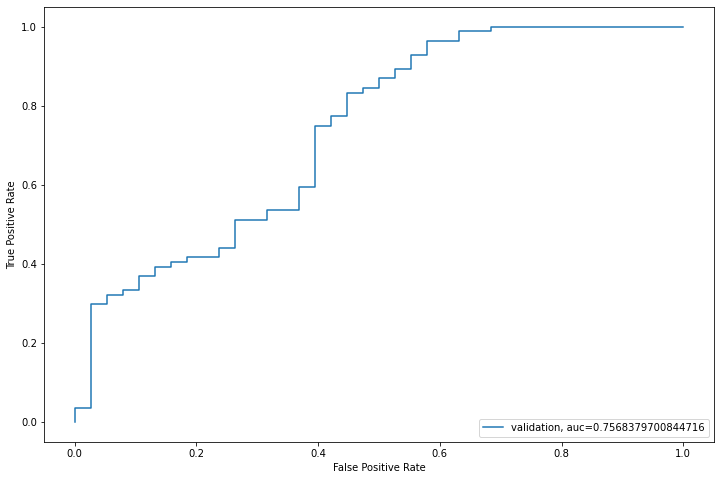

In [61]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_curve(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='validation, auc='+str(_.mean()))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [65]:
submission['Loan_Status']=pd.Series(pred_test)
submission['Loan_ID']=test_copy['Loan_ID']

In [66]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [68]:
pd.DataFrame(submission, columns=['Loan_ID', 'Loan_Status']).to_csv('Logistic.csv')

In [69]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

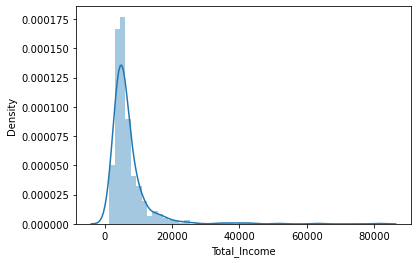

In [70]:
sns.distplot(train['Total_Income'])

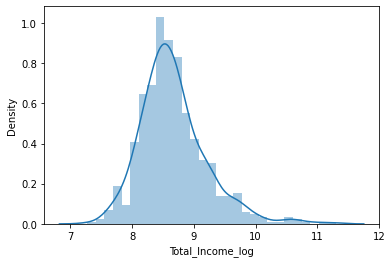

In [71]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
train['Total_Income_log'] = np.log(train['Total_Income'])

In [72]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

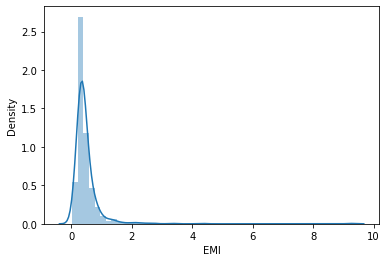

In [73]:
sns.distplot(train['EMI'])

In [74]:
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

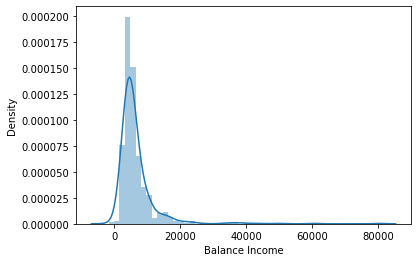

In [75]:
sns.distplot(train['Balance Income'])

In [76]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [85]:
x = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [87]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=1)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    model.fit(x_train, y_train)
    print('Accuracy : ', model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print('Cross Validation : ', np.mean(score)*100)

In [92]:
#logistic Regression
classify(model, x, y)

Accuracy :  80.29556650246306
Cross Validation :  75.09129681460749


In [93]:
from sklearn import tree

In [96]:
model = tree.DecisionTreeClassifier(random_state=1)
classify(model, x, y)

Accuracy :  71.42857142857143
Cross Validation :  71.82993469278955


In [97]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, max_depth=10)
classify(model, x,y)

Accuracy :  79.80295566502463
Cross Validation :  79.16033586565374
